# ИДЗ №2. Вариант 7. Гуреев Александр, БПИ227

## Условие задачи

При определении прочности стержня на разрыв испытывались 8 образцов типа `А` и образцов типа `В`. В результате испытаний получены следующие значения усилия разрыва (в кг) для образцов типа `А`:  
500; 510; 545; 600; 560; 530; 525; 540.   
Для образцов типа `В`:   
580; 590; 605; 545; 595; 574.  
Можно ли считать на уровне значимости `0.01`, что прочность стержня образцов типа `А` в среднем ниже, чем у образцов типа `В`? Решите задачу, предполагая, что:  
а) распределение контролируемого признака нормальное;  
б) распределение контролируемого признака неизвестно.

## Решение задачи

### 1. Подгрузим библиотеки

In [ ]:
import scipy as sc
from statistics import variance
from scipy.stats import t
from typing import *

### 2. Занесем данные в списки

In [ ]:
alpha = 0.01 # обозначим уровень значимости

v1 = [500, 510, 545, 600, 560, 530, 525, 540] # заносим в список значения образца А
len_v1 = len(v1) # вычисляем кол-во испытаний образца А

v2 = [580, 590, 605, 545, 595, 574] # заносим в список значения образца В
len_v2 = len(v2) # вычисляем кол-во испытаний образца В

### 3. Определимся с критериями  

- Для решения пункта `а` используем критерий Стьюдента, так как распределения нормальные и их дисперсии равны.

- Для решения пункта `б` будем использовать критерий Вилкоксона.

### 4. Формулы и расчеты

#### Пункт а.

Допустим, что выборки независимы и имеют равные дисперсии.

Дано:  
$V_1m \sim N(\mu_{v_1}, \sigma_{v_1}^2)$  
$V_2n \sim N(\mu_{v_2}, \sigma_{v_2}^2)$  
Так как у нас равные дисперсии (мы это допустили для применения критерия Стьюдента), то $\sigma_{v_1}^2=\sigma_{v_2}^2=\sigma^2$

Составим гипотезы:

1) $H_0: \mu_{v_1} = \mu_{v_2}$, $H_1: \mu_{v_1} < \mu_{v_2}$

2) $\alpha = 0.01$ (дано по условию)  

Используем тестовую статистику:

$$T(V_1,V_2) = \frac{\overline\theta - E(\overline\theta)}{D(\overline\theta)} = \frac{(\overline \mu_{v_2}-\overline \mu_{v_1}) - (\mu_{v_2}-\mu_{v_1})}{\sqrt{\frac{m+n}{mn}\cdot\frac{n\overline\sigma_{v_1}^2 + m\overline\sigma_{v_2}^2}{n+m-2}}}$$

$$T(V_1,V_2)\Big|_{H_0} = \frac{\overline \mu_{v_2}-\overline \mu_{v_1}}{\sqrt{\frac{m+n}{mn}\cdot\frac{n\overline\sigma_{v_2}^2 + m\overline\sigma_{v_1}^2}{n+m-2}}}\sim t(n+m-2)$$

Доверительный интервал: $$P\Big\{t_{\alpha/2}(n+m-2) < T(V_1,V_2) < t_{1-\alpha/2}(n+m-2)\Big\} = 1 - \alpha$$

In [ ]:
# Первая выборка
m_v1 = sum(v1) / len_v1 # среднее арифмитическое первого
print(f'Среднее арифм. для образца А: {m_v1}')
d_v1 = variance(v1) # выборочная дисперсия первого
print(f"Выборочная дисперсия для образца A: {d_v1}")

print('\n')
# Вторая выборка
m_v2 = sum(v2) / len_v2 # среднее арифмитическое второго
print(f'Среднее арифм. для образца А: {m_v2}')
d_v2 = variance(v2) # выборочная дисперсия второго
print(f"Выборочная дисперсия для образца В: {d_v2}")

print('\n')
# Используем тестовую статистику
T =  (m_v2 - m_v1) / ((len_v1+len_v2)/(len_v1*len_v2) * (len_v2*d_v2 + len_v1*d_v1)/(len_v2+len_v1-2)) ** 0.5
print(f'Наблюдаемое значение тестовой статистики: {T}')

# Найдем дов. интервал
interval = [t.ppf(alpha/2, len_v2+len_v1-2), t.ppf(1-alpha/2, len_v2+len_v1-2)]
print(f'Доверительный интервал: {interval}')

print('\n')
if interval[0] <= T <= interval[1]:
  print('Основная гипотеза H_0 не отвергнута.')
else:
  print('Основная гипотеза H_0 отвергнута в сторону H_1.')

Среднее арифм. для образца А: 538.75
Выборочная дисперсия для образца A: 976.7857142857143


Среднее арифм. для образца А: 581.5
Выборочная дисперсия для образца В: 439.5


Наблюдаемое значение тестовой статистики: 2.682245236451704
Доверительный интервал: [-3.054539588336871, 3.0545395883368704]


Основная гипотеза H_0 не отвергнута.


#### Пункт б.

Допустим, что выборки независимы.

Дано:
${V_{1}}_m \sim F(t)$, ${V_{2}}_n \sim F(t-\theta)$

$$T({V_{1}},{V_{2}}) = W_{m,n} = \sum_{i=1}^{n} R_i \text{, где $R_i$ ранг $Y_i$ в объед. выборке}$$

$$T({V_{1}},{V_{2}})\Big|_{H_0} \sim W(m,n)$$

Доверительный интервал: $$P\Big\{\min W(m,n) < T({V_{1}},{V_{2}}) < W_{1-\alpha/2}(m,n)\Big\} = 1 - \alpha$$


Так как объемы выборок 6 и 8, найдем в таблице критическую точку критерия Вилкоксона.

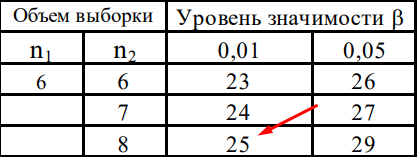

In [ ]:
# Функция для подсчета суммы рангов
def ranked(arr1: list, arr2: list):
    v1 = [(num, 'v1') for num in arr1]
    v2 = [(num, 'v2') for num in arr2]
    arr = sorted(v1 + v2, key=lambda pair: pair[0])
    ranks = []
    for pair in arr:
        if pair[1] == 'v2':
            idxs = [i + 1 for i, p in enumerate(arr) if p[0] == pair[0]]
            rank = sum(idxs) / len(idxs)
            ranks.append(rank)
    return sum(ranks)

W = ranked(v1, v2)
print(f'Статистика критерия Вилкоксона: {W}')

min_W = len_v2/2*(len_v2+1)
t_W = 25 # данные из таблички
interval_W = [min_W,t_W]
print(f'Доверительный W-интервал: {interval_W}')

if interval_W[0] <= W <= interval_W[1]:
  print('Основная гипотеза H_0 не отвергнута.')
else:
  print('Основная гипотеза H_0 отвергнута в сторону H_1.')

Статистика критерия Вилкоксона: 62.5
Доверительный W-интервал: [21.0, 25]
Основная гипотеза H_0 отвергнута в сторону H_1.
